In [51]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import json

tasks_path = '/local/crv/acanberk/folding-unfolding/src/assets/tasks/multi-longsleeve-train.hdf5'

Number of samples: 176
Attribute Keys
	 cloth_height : 0.5493491888046265
	 cloth_instance : 06855_Tshirt.obj.pkl
	 cloth_mass : 50
	 cloth_width : 1.1458971500396729
	 flatten_area : 0.3521907603841846
	 flip_mesh : 0
	 initial_coverage : 0.18832211939530014
	 pickpoint : 2675
	 pkl_path : /local/crv/acanberk/folding-unfolding/src/cloth_data/cloth3d_pickle/Tshirt/06855_Tshirt.obj.pkl
	 task_difficulty : hard
Data Keys
	 all_keypoint_groups : int64 (6, 10)
	 cloth_stiff : float64 (3,)
		 [0.75 0.02 0.02]
	 init_particle_pos : float32 (80000,)
	 init_rgb : uint8 (480, 480, 3)


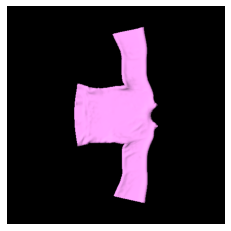

	 mesh_bend_edges : int64 (26582,)
	 mesh_faces : int64 (39720,)
	 mesh_nocs_verts : float32 (6716, 3)
	 mesh_shear_edges : int64 (26480,)
	 mesh_stretch_edges : int64 (26676,)
	 mesh_verts : float64 (20148,)
	 particle_pos : float32 (80000,)
	 particle_vel : float32 (60000,)
	 phase : int32 (20000,)
	 shape_pos : float32 (28,)
	 task_rgb : uint8 (480, 480, 3)


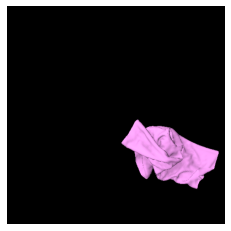

In [52]:
#load the data
with h5py.File(tasks_path, 'r') as f:
    keys = list(f.keys())
    print("Number of samples:", len(keys))

    sample_key = keys[np.random.randint(0, len(keys))]
    sample = f[sample_key]

    #load the data
    keys = list(sample.keys())
    attribute_keys = list(sample.attrs.keys())

    print("Attribute Keys")
    for key in attribute_keys:
        print("\t", key, ':', sample.attrs[key])
   
    print("Data Keys")
    for key in keys:
        print("\t", key, ':',  sample[key].dtype, sample[key].shape)
        #if the data is a numpy array of total size less than 10, print it
        if sample[key].size < 10 and sample[key].size != 0:
            print("\t\t", sample[key][:])

        #if the shape of the numpy array looks like an image, plot it. Don't plot axes and make sure the image is as small as possible
        if len(sample[key].shape) == 3 and (sample[key].shape[-1] == 3 or sample[key].shape[0] == 3):
            img = np.array(sample[key])
            plt.imshow(sample[key])
            plt.axis('off')
            plt.show()


